In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Thyroid
### 1. Get-to-know

In [29]:
file_ = open("ThyroidDataset.csv")
thyroid_ = pd.read_csv(file_)
thyroid_.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [30]:
thyroid_.shape

(3772, 30)

In [31]:
# loading the data from csv file to a Panda Dataframe
file = open("thyroid.csv")
thyroid = pd.read_csv(file)

# printing the first 5 rows of the dataframe
thyroid.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


In [32]:
thyroid.shape

(9171, 30)

In [33]:
thyroid.drop("other", axis=1, inplace=True)

In [34]:
feature_cols = ['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'target']

In [35]:
thyroid.columns = feature_cols

In [36]:
thyroid

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,-[870119027]


In [37]:
thyroid.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'target'],
      dtype='object')

In [38]:
thyroid.isnull().sum().sum()

0

In [39]:
target = thyroid.target
create = target.str.split('([a-zA-Z])+', expand=True)


In [40]:
create = create[1]
target = create.replace({None: 'Z'}) #here Z is none type
thyroid.target = target

In [41]:
thyroid.target.unique()

array(['Z', 'S', 'F', 'K', 'R', 'I', 'M', 'N', 'G', 'A', 'J', 'L', 'Q',
       'C', 'O', 'H', 'D', 'P', 'B', 'E'], dtype=object)

In [42]:
thyroid['target'].value_counts()

Z    6770
K     553
I     359
G     359
F     233
R     196
A     147
L     115
M     111
N     110
S      85
J      43
B      21
C      18
Q      14
O      14
D       9
H       8
P       5
E       1
Name: target, dtype: int64

In [43]:
thyroid = thyroid.replace(['?'], np.nan)
thyroid.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2603
TT4 measured                    0
TT4                           441
T4U measured                    0
T4U                           808
FTI measured                    0
FTI                           801
TBG measured                    0
TBG                          8822
target                          0
dtype: int64

In [44]:
thyroid.drop(['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
              'FTI measured', 'TBG measured', 'TBG'], axis=1, inplace=True)
thyroid

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64,0.83,77,Z
9167,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91,0.92,99,Z
9168,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113,1.27,89,I
9169,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75,0.85,88,Z


In [45]:
thyroid.sex.replace({'F': 2, 'M': 1}, inplace=True)

In [46]:
round_values = round(thyroid.sex.mean())
thyroid.sex.fillna(round_values, inplace=True)

In [47]:
thyroid.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [48]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

In [49]:
cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in cols:
   thyroid[i] = knn_imputer.fit_transform(thyroid[[i]])
thyroid.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

### EDA 

<AxesSubplot:>

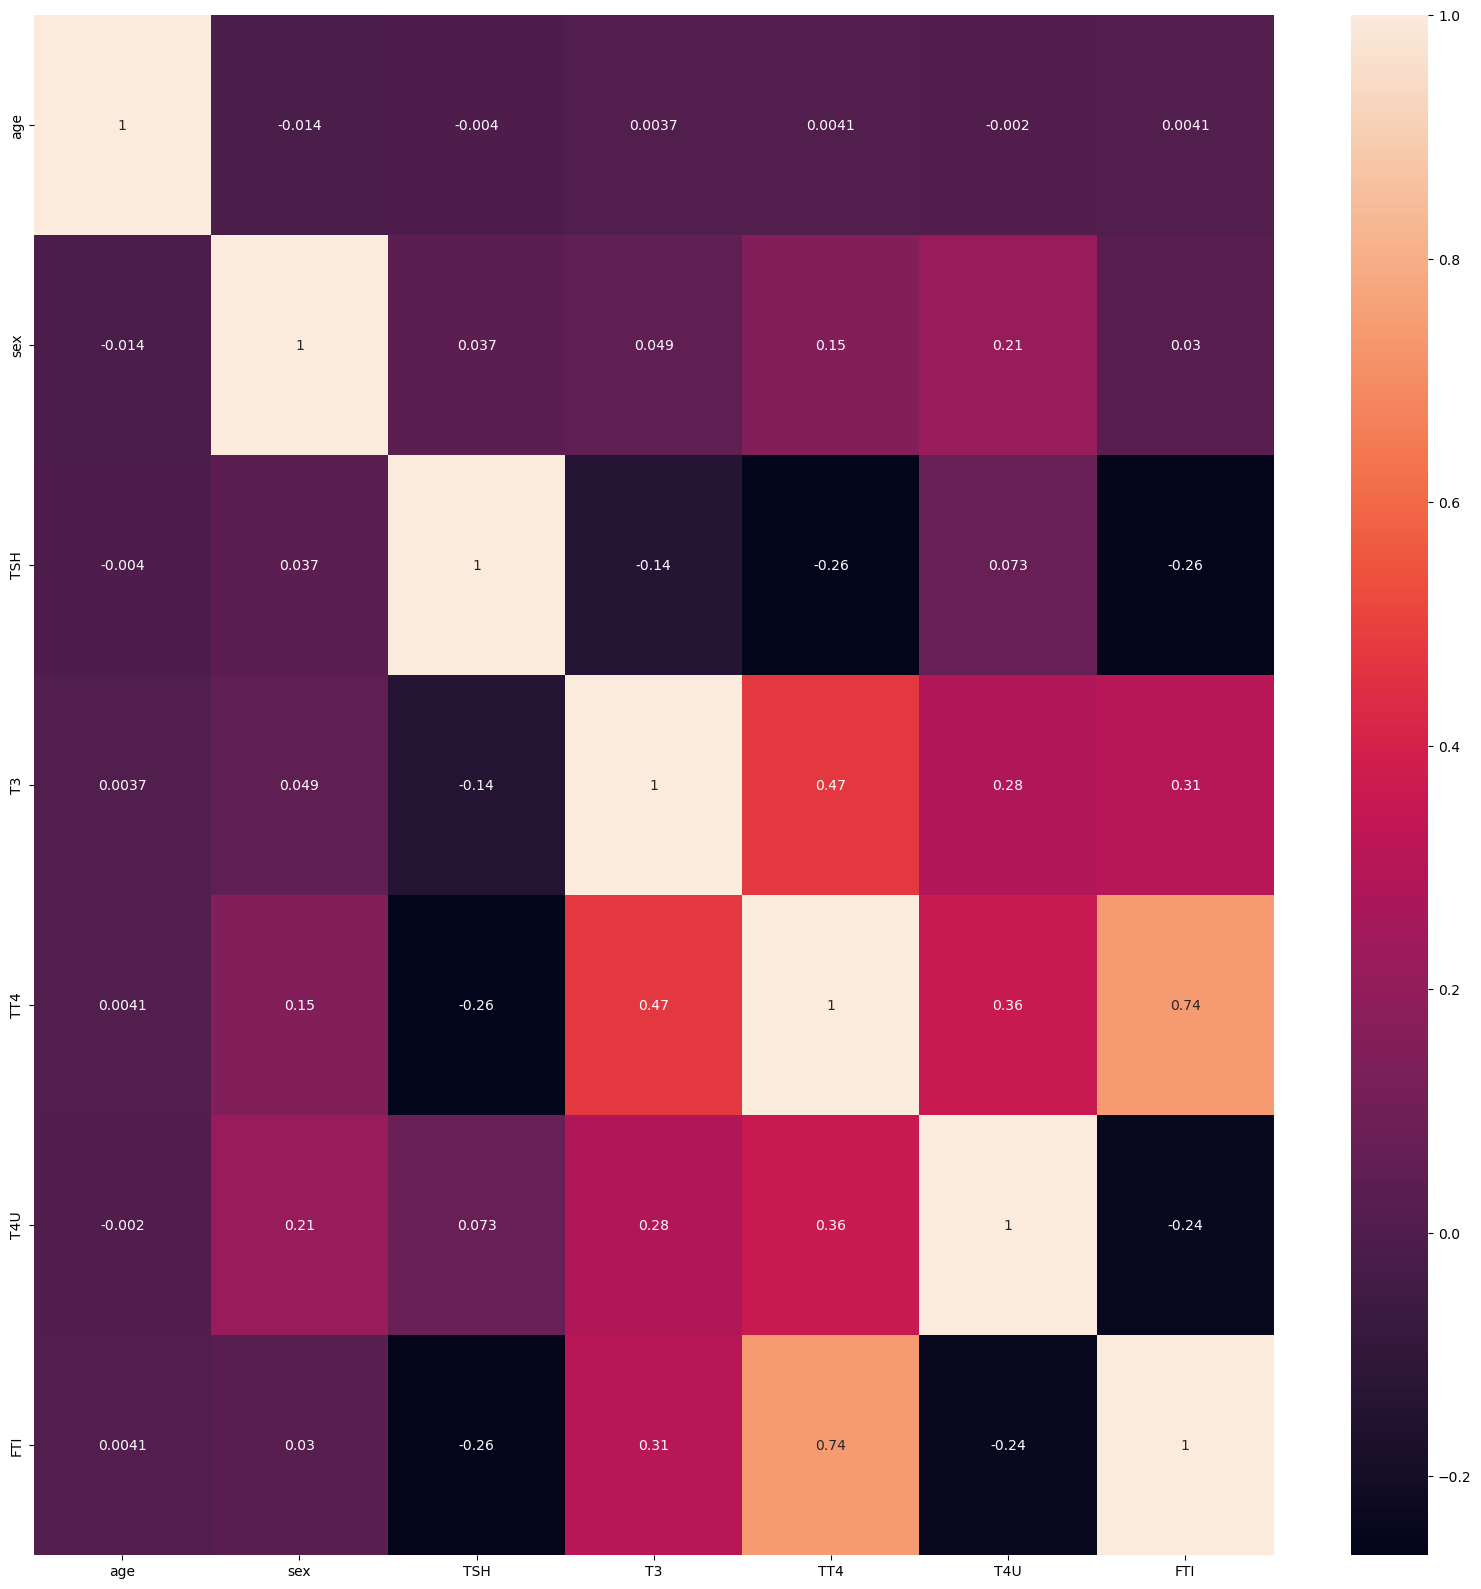

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(thyroid.corr(), annot=True)

In [51]:
thyroid.corr()

,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.014175,-0.003979,0.003693,0.004122,-0.002045,0.004108
sex,-0.014175,1.000000,0.036723,0.048890,0.150479,0.214723,0.030149
TSH,-0.003979,0.036723,1.000000,-0.136613,-0.264756,0.072962,-0.257901
T3,0.003693,0.048890,-0.136613,1.000000,0.471792,0.281336,0.312401
TT4,0.004122,0.150479,-0.264756,0.471792,1.000000,0.362280,0.738279
T4U,-0.002045,0.214723,0.072962,0.281336,0.362280,1.000000,-0.238927
FTI,0.004108,0.030149,-0.257901,0.312401,0.738279,-0.238927,1.000000


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
cols = thyroid.select_dtypes(include=['object'])
cols

,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
1,f,f,f,f,f,f,f,f,t,f,f,f,f,f,Z
2,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
3,f,f,f,f,f,f,f,f,f,f,f,f,f,f,S
4,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,f,f,f,f,f,f,f,f,t,f,f,f,f,f,Z
9167,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
9168,f,f,f,f,f,f,f,f,f,f,f,f,f,f,I
9169,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z


In [54]:
for i in cols.columns:
    try:
        thyroid[i] = le.fit_transform(thyroid[i])
    except:
        continue

In [55]:
for a in range(len(thyroid.corr())):
    for b in range(a):
        if((thyroid.corr().iloc[a, b]) >= 0.7):
            print(thyroid.corr().columns[b])

TT4


In [56]:
thyroid.drop('TT4', axis=1, inplace=True)

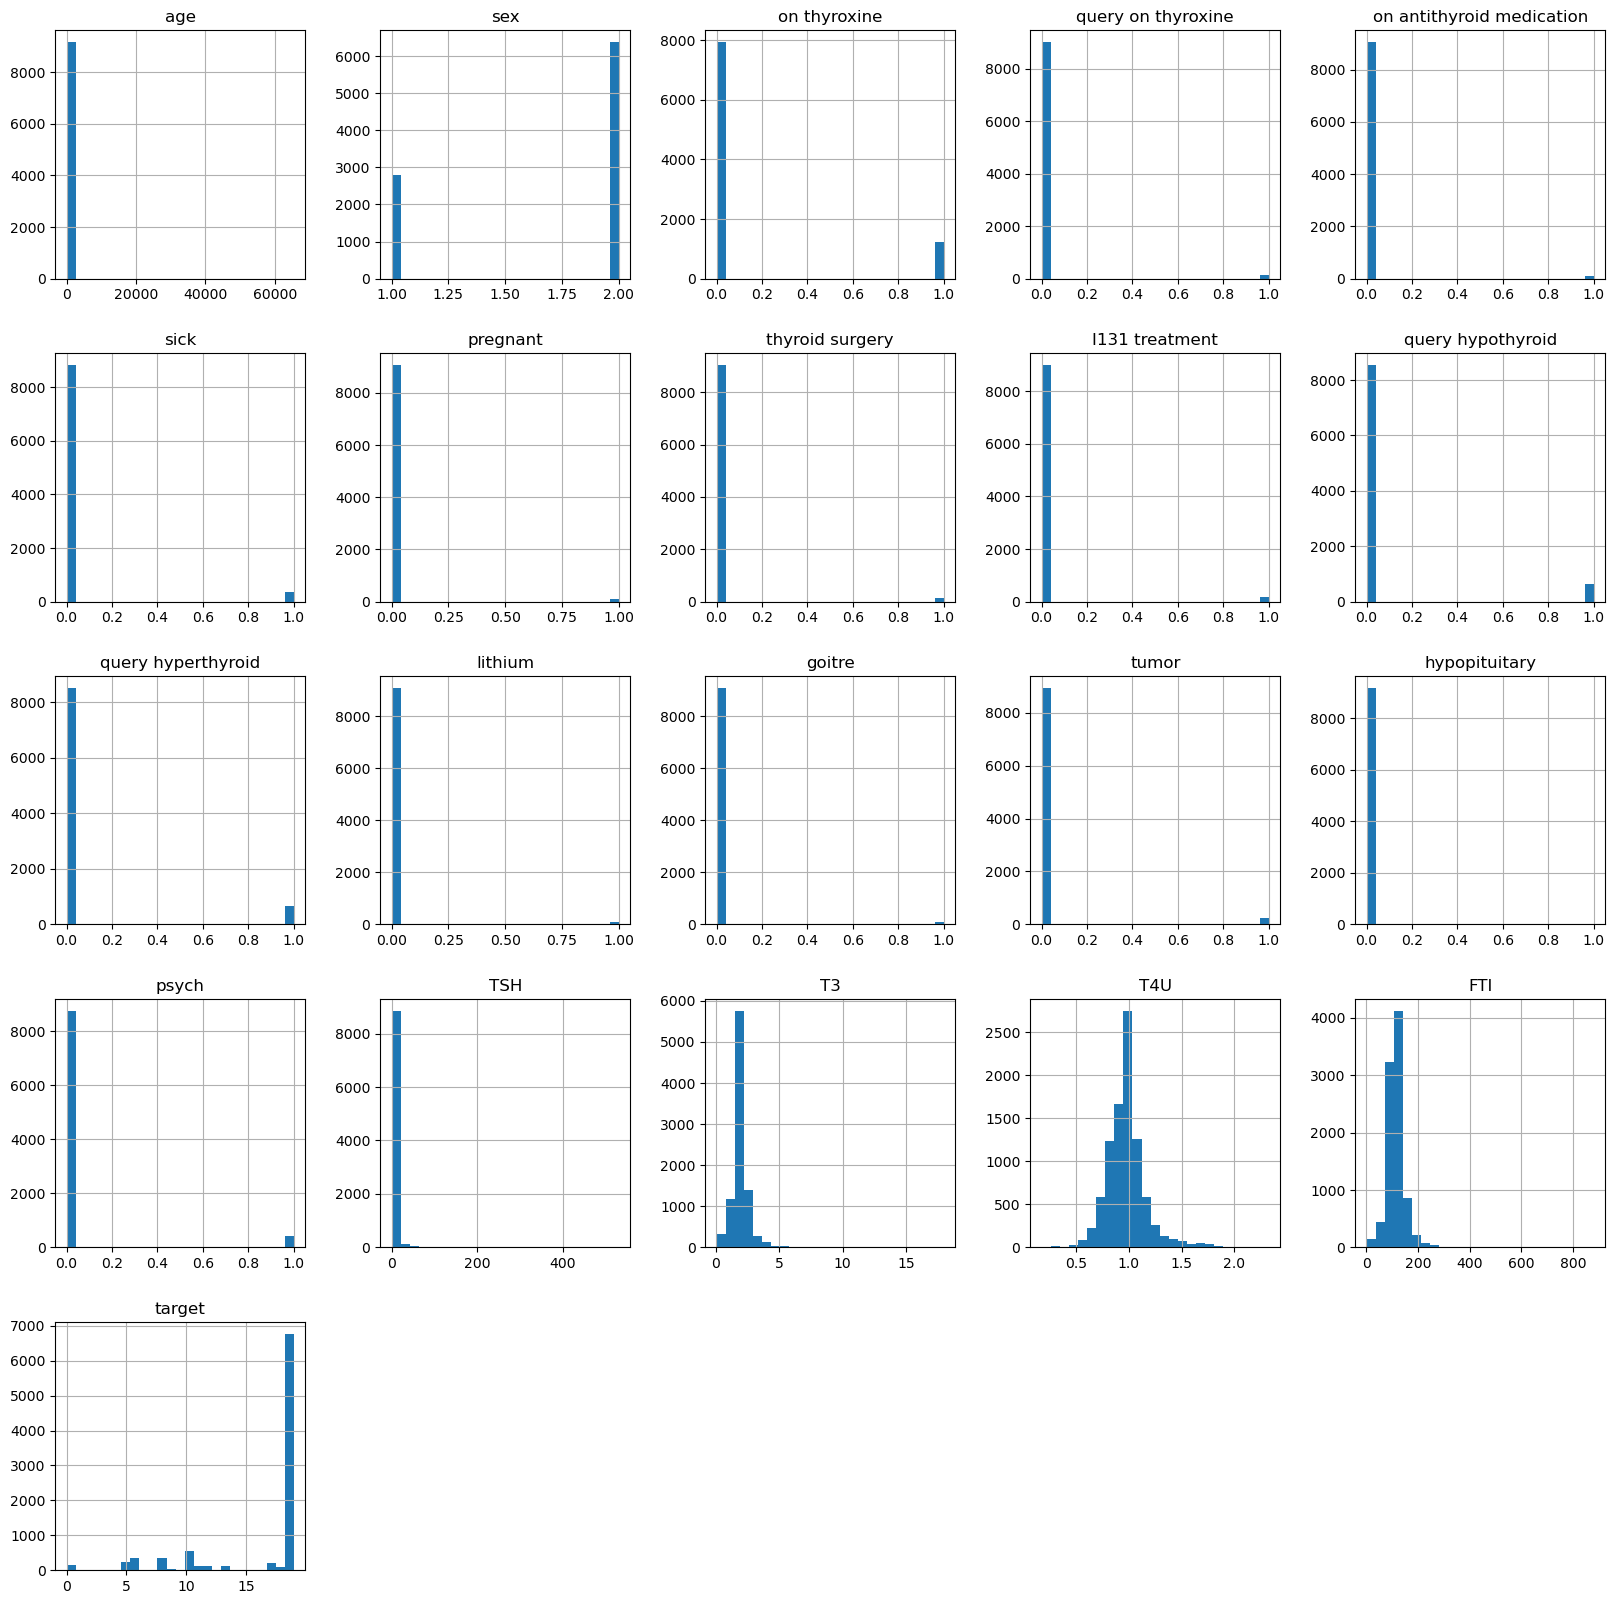

In [57]:
thyroid.hist(bins=25, figsize=(20, 20))
plt.show()

#### preprocessing techniques

In [58]:
X = thyroid.drop('target', axis=1)
y = thyroid.target

In [61]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
0,29,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,0.976056,113.640746
1,41,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
2,36,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
3,32,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
4,60,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218993,1.970629,0.830000,77.000000
9167,22,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.920000,99.000000
9168,69,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,1.270000,89.000000
9169,47,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.850000,88.000000


In [59]:
y

0       19
1       19
2       19
3       18
4       19
        ..
9166    19
9167    19
9168     8
9169    19
9170    19
Name: target, Length: 9171, dtype: int64

In [ ]:
thyroid_2 = X #(without PCA)

#### PCA Technique

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [ ]:
v = pca.fit_transform(X)

In [ ]:
X_pca = pd.DataFrame(data=v, columns=['component_1', 'component_2', 'component_3', 'component_4', 'component_5',
                                      'component_6', 'component_7', 'component_8', 'component_9', 'component_10'])

In [ ]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-44.560401,0.768306,-3.539707,-0.060346,-0.278302,0.186705,-0.101526,-0.008343,-0.036863,-0.054012
1,-32.560678,0.005264,-0.001276,0.074488,-0.307936,0.256393,0.767614,-0.459433,0.084921,0.004770
2,-37.560681,0.005585,-0.001597,0.016450,-0.269516,0.186457,-0.105393,-0.006417,-0.037733,-0.052237
3,-41.560681,0.006190,-0.001784,0.016456,-0.269494,0.186463,-0.105379,-0.006425,-0.037736,-0.052238
4,-13.560682,0.001958,-0.000475,0.016418,-0.269653,0.186422,-0.105475,-0.006369,-0.037716,-0.052226
...,...,...,...,...,...,...,...,...,...,...
9166,-17.565725,-35.815558,-7.717545,0.204036,0.670809,0.039462,0.841271,-0.465404,0.039248,-0.003876
9167,-51.562695,-14.304689,-3.086385,0.035777,0.706841,-0.003652,-0.033362,-0.006760,-0.082480,-0.059033
9168,-4.564074,-24.087764,-5.190078,0.128057,0.670897,-0.034908,-0.036777,-0.016309,-0.078404,-0.052621
9169,-26.564217,-25.061240,-5.400598,0.142657,-0.264609,0.156261,-0.103200,-0.012638,-0.039070,-0.054794


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[i])

ValueError: Expected 2D array, got 1D array instead:
array=[-44.560401   -32.56067766 -37.56068145 ...  -4.56407415 -26.56421713
 -42.56738383].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_pca.hist(bins=25, figsize=(20, 20))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_pca, y, test_size=0.33, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [ ]:
y_pred

In [ ]:
accuracy_score(y_pred, y_valid)

0.8113643871820284

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [ ]:
accuracy_score(y_pred, y_valid)

0.7489263296993723

In [ ]:
# # Set the width and height of the figure
# plt.figure(figsize=(8,4))

# # Add title
# plt.title("The count of 'binaryClass'")

# # Bar chart
# sns.barplot(x=thyroid['binaryClass'].value_counts().index, y=thyroid['binaryClass'].value_counts(),
#             palette=['orange', 'grey'])

# # Add label for vertical axis
# plt.ylabel("binaryClass")

In [ ]:
# import plotly.express as px
# fig = px.bar(thyroid, x=thyroid['binaryClass'].value_counts(),
#              y=thyroid['binaryClass'].value_counts(),
#              color=[1, 0])
# fig.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(thyroid)
thyroid


ValueError: y should be a 1d array, got an array of shape (3772, 30) instead.

In [ ]:
d

### 2. Clean data
- Our data has not any missing value but we have to deal with outliers.

In [ ]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

def remove_upper_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] < (Q3 + 1.5*IQR)]

def remove_lower_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] > (Q1 - 1.5*IQR)]

- - #### 'BloodPressure'

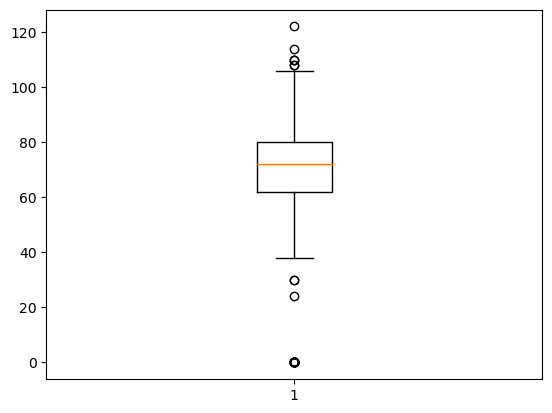

In [ ]:
plt.boxplot(d_data.BloodPressure)
plt.show()

In [ ]:
outliers_of(d_data, 'BloodPressure')

The number of upper outliers= 7

The number of lower outliers= 38

The percentage of outliers= 5.8999999999999995%


In [ ]:
# heart_data = remove_upper_outliers(heart_data, 'trestbps')
# heart_data.shape

In [ ]:
d_data = remove_lower_outliers(d_data, 'BloodPressure')
d_data.shape

(730, 9)

In [ ]:
outliers_of(d_data, 'BloodPressure')

The number of upper outliers= 10

The number of lower outliers= 1

The percentage of outliers= 1.5%


- - #### 'Insulin'

In [ ]:
d_data = remove_upper_outliers(d_data, 'Insulin')
d_data.shape

(697, 9)

In [ ]:
outliers_of(d_data, 'Insulin')

The number of upper outliers= 4

The number of lower outliers= 0

The percentage of outliers= 0.6%


- - #### 'DiabetesPedigreeFunction'

In [ ]:
d_data = remove_upper_outliers(d_data, 'DiabetesPedigreeFunction')
d_data.shape

(670, 9)

In [ ]:
outliers_of(d_data, 'DiabetesPedigreeFunction')

The number of upper outliers= 12

The number of lower outliers= 0

The percentage of outliers= 1.7999999999999998%


### 3. Refine data
>We will use the Random Forest to define the important features at first.
#### Separating the features & Target

In [ ]:
X = d_data.drop(columns='Outcome', axis=1)
y = d_data.Outcome

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                      stratify=y, random_state=2)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
imp_features = pd.Series(model.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)
imp_features

Glucose                     0.235725
BMI                         0.162430
Age                         0.148789
DiabetesPedigreeFunction    0.132960
Pregnancies                 0.092347
BloodPressure               0.087859
Insulin                     0.071779
SkinThickness               0.068111
dtype: float64

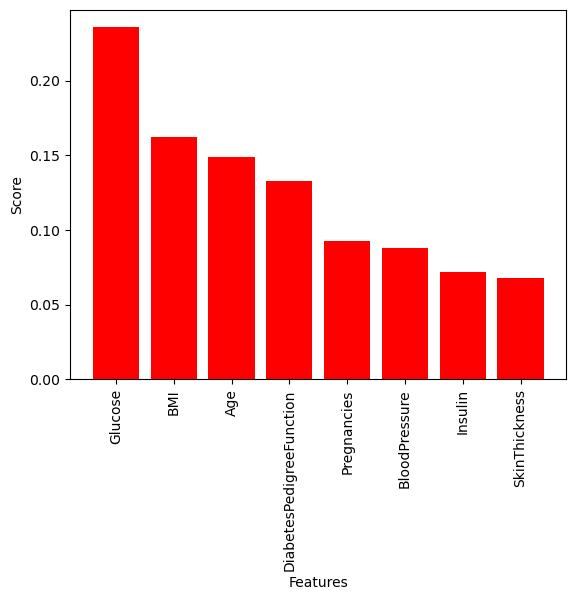

In [ ]:
plt.bar(imp_features.index, imp_features, color="r")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
print(f'MAE= {mean_absolute_error(y_valid, y_pred)}')
# accuracy score on the valid data
print(f'\nAccuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
# accuracy score on the training data
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')
print(f'\nThe valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')
print(f'\nThe confusion matrix:\n {confusion_matrix(y_valid, y_pred)}')
print(classification_report(y_valid, y_pred))
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

MAE= 0.20149253731343283

Accuracy score of valid data= 0.7985074626865671
Accuracy score of training data= 1.0

The valid score of valid data= 79.8507462686567%
The train score of training data= 100.0%

The confusion matrix:
 [[80 11]
 [16 27]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        91
           1       0.71      0.63      0.67        43

    accuracy                           0.80       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.79      0.80      0.79       134

Precision= 0.7105263157894737
Recall= 0.627906976744186


## Data Standardization
### 1. Log Normalization
- If we want to find out whether or not we should use Log Normalization, we should calculate the variance of variables, then compare them.  

In [ ]:
for i in X.columns:
    print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'Pregnancies'= 
				11.352
The variance of 'Glucose'= 
				975.3
The variance of 'BloodPressure'= 
				144.677
The variance of 'SkinThickness'= 
				247.337
The variance of 'Insulin'= 
				6399.472
The variance of 'BMI'= 
				50.219
The variance of 'DiabetesPedigreeFunction'= 
				0.062
The variance of 'Age'= 
				139.942


>Because we have some features with min_0, we need to change them into the next value above_0 to log them as well. 

In [ ]:
X.columns[1:]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
def replace_0_by_next(data):
    for i in data.columns[1:]:
        if data[i].min() == 0:
            col_lst = []
            for j in data[i].unique():
                if j != 0:
                    col_lst.append(j)
            col_lst_min = np.min(col_lst)
            data[i].replace(0, col_lst_min, inplace=True)
    print(data[data.columns[1:]].min())

In [ ]:
replace_0_by_next(X)

Glucose                     44.000
BloodPressure               38.000
SkinThickness                7.000
Insulin                     15.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64


>But with 'Pregnancies', we will change 0 value to 0.001.

In [ ]:
# X['Pregnancies'].replace(0, 0.001, inplace=True)

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

>We will apply for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [ ]:
# X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']] = np.log(X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']])
# for i in X.columns:
#     print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

In [ ]:
# sns.pairplot(X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']])

In [ ]:
# sns.histplot(data=X[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']],
#              kde=True)

### 2. Feature Scaling
- applied for K-Means, K-Nearest-Neighbor, PCA, Gradient Descent
- not used for Naive Bayes, Linear Discriminant Analysis, Tree-Based models

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
# X_train = scaler.transform(X_train)
# X_valid = scaler.transform(X_valid)

In [ ]:
df = pd.DataFrame(X_transformed, columns=X.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.625067,0.952053,-0.058116,0.932486,-0.776026,0.209493,0.787014,1.411368
1,-0.860022,-1.136299,-0.557317,0.478661,-0.776026,-0.818251,-0.317974,-0.195960
2,1.219103,2.112250,-0.723717,-1.185364,-0.776026,-1.302759,0.967175,-0.111364
3,-0.860022,-1.003706,-0.557317,0.024836,0.290249,-0.598020,-1.054632,-1.041922
4,0.328050,-0.108697,0.108284,-1.185364,-0.776026,-0.965071,-0.918511,-0.280556


<AxesSubplot:title={'center':'After Scaling'}, xlabel='Pregnancies', ylabel='Density'>

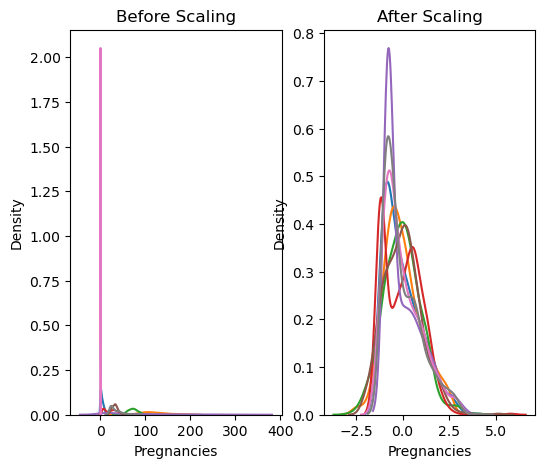

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['Pregnancies'], ax=ax1)
sns.kdeplot(X['Glucose'], ax=ax1)
sns.kdeplot(X['BloodPressure'], ax=ax1)
sns.kdeplot(X['SkinThickness'], ax=ax1)
sns.kdeplot(X['Insulin'], ax=ax1)
sns.kdeplot(X['BMI'], ax=ax1)
sns.kdeplot(X['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(X['Age'], ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(df['Pregnancies'], ax=ax2)
sns.kdeplot(df['Glucose'], ax=ax2)
sns.kdeplot(df['BloodPressure'], ax=ax2)
sns.kdeplot(df['SkinThickness'], ax=ax2)
sns.kdeplot(df['Insulin'], ax=ax2)
sns.kdeplot(df['BMI'], ax=ax2)
sns.kdeplot(df['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(df['Age'], ax=ax2)


## Model Training
#### Splitting the data to training data & valid data

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

### 1. Create model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [ ]:
models = [LogisticRegression(solver='liblinear'),
          GaussianNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(criterion='entropy'),
          RandomForestClassifier(n_estimators=200),
          SVC(kernel='linear')]

In [ ]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i = 0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

[0.76119403 0.76119403 0.75373134 0.78358209 0.79104478]
[0.74626866 0.73880597 0.74626866 0.78358209 0.7761194 ]
[0.73880597 0.73134328 0.7238806  0.73880597 0.73134328]


[0.69402985 0.62686567 0.67910448 0.70149254 0.69402985]
[0.78358209 0.74626866 0.76119403 0.79850746 0.79104478]
[0.80597015 0.7761194  0.75373134 0.78358209 0.78358209]


In [ ]:
cv_df

,model_name,accuracy
0,LogisticRegression,0.770149
1,GaussianNB,0.758209
2,KNeighborsClassifier,0.732836
3,DecisionTreeClassifier,0.679104
4,RandomForestClassifier,0.776119
5,SVC,0.780597


Text(0.5, 1.0, 'Accuracies of Algorithms')

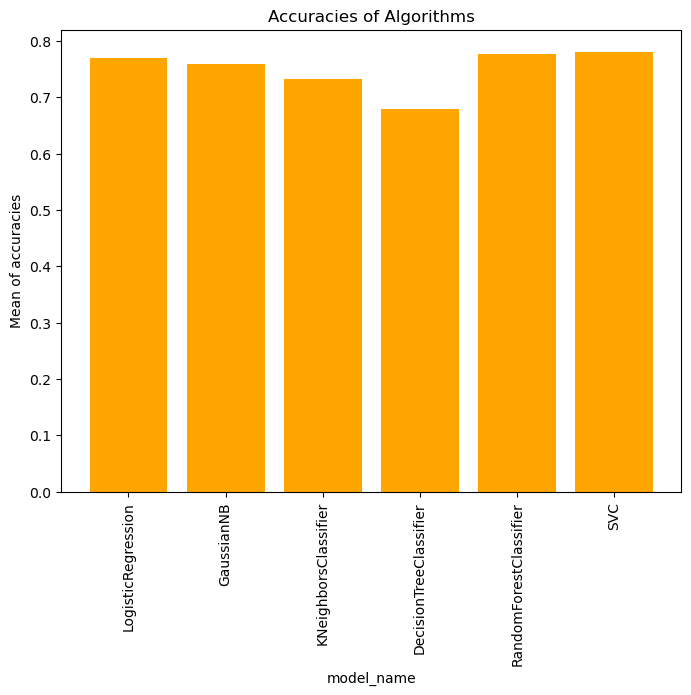

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(cv_df['model_name'], cv_df['accuracy'], color='orange')
plt.xlabel('model_name')
plt.ylabel('Mean of accuracies')
plt.xticks(rotation='vertical')
plt.title('Accuracies of Algorithms')

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [ ]:
print(mean_absolute_error(y_valid, y_pred))

0.15671641791044777


### 3. Evaluate model
#### Accuracy Score

In [ ]:
print(f'Accuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data= 0.8432835820895522
Accuracy score of training data= 0.7723880597014925


In [ ]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 84.32835820895522%
The train score of training data= 77.23880597014924%


#### Performance Metric

In [ ]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[98  6]
 [15 15]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       104
           1       0.71      0.50      0.59        30

    accuracy                           0.84       134
   macro avg       0.79      0.72      0.75       134
weighted avg       0.83      0.84      0.83       134



#### Precision and Recall

In [ ]:
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.7142857142857143
Recall= 0.5


In [ ]:
input_data = (57,1,0,140,192,0,1,148,0,0.4,1,0,1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


In [ ]:
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have a Heart Disease.")
else:
    print("The Person has Heart Disease.")  

ValueError: X has 13 features, but LogisticRegression is expecting 8 features as input.